<a href="https://colab.research.google.com/github/Shoab02/Healthcheck/blob/main/models/AutoML_check.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 177.4 MB 42 kB/s 
  Created wheel for h2o: filename=h2o-3.38.0.2-py2.py3-none-any.whl size=177521195 sha256=058fd0dcdcf72b03e167d0a54c713c034c74ee7155dd7193f6d00d7d8e7cc392
  Stored in directory: /root/.cache/pip/wheels/e4/ef/ab/a9b2e452e18b3dfea0b6114bc57c3b9e8b0e464eb2d03230e1
Successfully built h2o


In [3]:
import h2o
from h2o.automl import H2OAutoML

In [4]:
import pandas as pd
import numpy as np


In [15]:
df = pd.read_csv('/content/heart.csv')
shuffled_df = df.sample(frac=1)

train_size = int(0.7*(len(df)))  
validation_size = int(0.85*(len(df))) 

train_df = shuffled_df[:train_size]
validation_df = shuffled_df[train_size:validation_size]
test_df = shuffled_df[validation_size:]

In [6]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.16" 2022-07-19; OpenJDK Runtime Environment (build 11.0.16+8-post-Ubuntu-0ubuntu118.04); OpenJDK 64-Bit Server VM (build 11.0.16+8-post-Ubuntu-0ubuntu118.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmphuhl5s_q
  JVM stdout: /tmp/tmphuhl5s_q/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmphuhl5s_q/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,04 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.2
H2O_cluster_version_age:,"7 days, 6 hours and 58 minutes"
H2O_cluster_name:,H2O_from_python_unknownUser_sqiav6
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [16]:
h2o_train_df = h2o.H2OFrame(train_df)
h2o_validation_df = h2o.H2OFrame(validation_df)
h2o_test_df = h2o.H2OFrame(test_df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [17]:
h2o_train_df['output'] = h2o_train_df['output'].asfactor()
h2o_validation_df['output'] = h2o_validation_df['output'].asfactor()
h2o_test_df['output']=  h2o_test_df['output'].asfactor()

In [18]:
aml = H2OAutoML(max_models = 5, seed = 10, exclude_algos = ["StackedEnsemble"], verbosity="info", nfolds=0, balance_classes=True, max_after_balance_size=0.3)


In [19]:
X = h2o_train_df.columns
y = "output"
X.remove(y)

In [20]:
aml.train(x = X, y = y, training_frame = h2o_train_df, validation_frame=h2o_validation_df)


AutoML progress: |
23:03:17.921: Project: AutoML_2_20221103_230317
23:03:17.921: Cross-validation disabled by user: no fold column nor nfolds > 1.
23:03:17.929: Setting stopping tolerance adaptively based on the training frame: 0.05
23:03:17.929: Build control seed: 10
23:03:17.929: training frame: Frame key: AutoML_2_20221103_230317_training_py_6_sid_9d25    cols: 14    rows: 212  chunks: 1    size: 3968  checksum: 3747442675219954691
23:03:17.929: validation frame: Frame key: py_7_sid_9d25    cols: 14    rows: 45  chunks: 1    size: 2014  checksum: -141875506190992012
23:03:17.930: leaderboard frame: Frame key: py_7_sid_9d25    cols: 14    rows: 45  chunks: 1    size: 2014  checksum: -141875506190992012
23:03:17.930: blending frame: NULL
23:03:17.930: response column: output
23:03:17.930: fold column: null
23:03:17.930: weights column: null
23:03:17.930: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_1_AutoML_2_20221103_230317


Model Summary: 
    number_of_trees
--  -----------------
    35

ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.12547475637663855
RMSE: 0.354224161198299
LogLoss: 0.40521845671086276
Mean Per-Class Error: 0.1507246376811594
AUC: 0.9059329710144928
AUCPR: 0.9122749754459432
Gini: 0.8118659420289855

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.48768696188926697
       0    1    Error    Rate
-----  ---  ---  -------  ------------
0      75   17   0.1848   (17.0/92.0)
1      14   106  0.1167   (14.0/120.0)
Total  89   123  0.1462   (31.0/212.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.487687     0.872428  69
max f2                       0.194442     0.931142  97
max f0point5                 0.487687     0.866013  69
max accuracy                 0.487687     0.853774  69
max precision                0.90215      1         0
max recall                   0.154369     1         103
max specificity              0.90215      1         0
max absolute_mcc             0.487687     0.701512  69
max min_per_class_accuracy   0.544893     0.816667  61
max mean_per_class_accuracy  0.487687     0.849275  69
max tns                      0.90215      92        0
max fns                      0.90215      111       0
max fps                      0.0785374    92        113
max tps                      0.154369     120       103
max tnr                      0.90215      1         0
max fnr                      0.90215      0.925     0
max fpr                      0.0785374    1         113
max tpr                      0.154369     1         103

Gains/Lift Table: Avg response rate: 56.60 %, avg score: 52.05 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0424528                   0.90215            1.76667    1.76667            1                0.90215    1                           0.90215             0.075           0.075                      76.6667   76.6667            0.075
2        0.0424528                   0.892809           0          1.76667            0                0          1                           0.90215             0               0.075                      -100      76.6667            0.075
3        0.0566038                   0.880921           1.76667    1.76667            1                0.880921   1                           0.896843            0.025           0.1                        76.6667   76.6667            0.1
4        0.113208                    0.875759           1.47222    1.61944            0.833333         0.877005   0.916667                    0.886924            0.0833333       0.183333                   47.2222   61.9444            0.161594
5        0.15566                     0.849542           1.76667    1.6596             1                0.850738   0.939394                    0.877055            0.075           0.258333                   76.6667   65.9596            0.236594
6        0.20283                     0.818597           1.76667    1.6845             1                0.837706   0.953488                    0.867904            0.0833333       0.341667                   76.6667   68.4496            0.319928
7        0.301887                    0.749077           1.68254    1.68385            0.952381         0.784034   0.953125  

In [21]:
aml.leaderboard

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
XGBoost_1_AutoML_2_20221103_230317,0.934783,0.407569,0.948836,0.110672,0.353341,0.12485
DRF_1_AutoML_2_20221103_230317,0.931818,0.383652,0.943912,0.134387,0.348149,0.121208
XGBoost_2_AutoML_2_20221103_230317,0.907115,0.38326,0.915216,0.157115,0.354425,0.125617
GLM_1_AutoML_2_20221103_230317,0.895257,0.418733,0.907183,0.135375,0.361538,0.13071
GBM_1_AutoML_2_20221103_230317,0.5,0.698994,0.511111,0.5,0.502885,0.252893


In [22]:
y_pred = aml.leader.predict(h2o_test_df)

xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%


In [24]:
aml.leader.model_performance(h2o_test_df)

ModelMetricsBinomial: xgboost
** Reported on test data. **

MSE: 0.1669422331727024
RMSE: 0.4085856497390754
LogLoss: 0.5032986136772887
Mean Per-Class Error: 0.23295454545454547
AUC: 0.8342803030303031
AUCPR: 0.8234253249806683
Gini: 0.6685606060606062

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.350591778755188
       0    1    Error    Rate
-----  ---  ---  -------  -----------
0      15   9    0.375    (9.0/24.0)
1      2    20   0.0909   (2.0/22.0)
Total  17   29   0.2391   (11.0/46.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.350592     0.784314  25
max f2                       0.200031     0.873016  32
max f0point5                 0.586958     0.784314  17
max accuracy                 0.586958     0.782609  17
max precision                0.90215      1         0
max recall                   0.200031     1         32
max specificity              0.90215      1         0
max absolute_mcc             0.586958     0.564902  17
max min_per_class_accuracy   0.513934     0.75      20
max mean_per_class_accuracy  0.586958     0.780303  17
max tns                      0.90215      24        0
max fns                      0.90215      21        0
max fps                      0.0785374    24        38
max tps                      0.200031     22        32
max tnr                      0.90215      1         0
max fnr                      0.90215      0.954545  0
max fpr                      0.0785374    1         38
max tpr                      0.200031     1         32

Gains/Lift Table: Avg response rate: 47.83 %, avg score: 49.59 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0217391                   0.892597           2.09091   2.09091            1                0.90215   1                           0.90215             0.0454545       0.0454545                  109.091   109.091            0.0454545
2        0.0217391                   0.883044           0         2.09091            0                0         1                           0.90215             0               0.0454545                  -100      109.091            0.0454545
3        0.0434783                   0.872064           2.09091   2.09091            1                0.880921  1                           0.891536            0.0454545       0.0909091                  109.091   109.091            0.0909091
4        0.0434783                   0.860676           0         2.09091            0                0         1                           0.891536            0               0.0909091                  -100      109.091            0.0909091
5        0.0652174                   0.85415            2.09091   2.09091            1                0.855614  1                           0.879562            0.0454545       0.136364                   109.091   109.091            0.136364
6        0.108696                    0.845626           2.09091   2.09091            1                0.849063  1                           0.867362            0.0909091       0.227273                   109.091   109.091            0.227273
7        0.152174                    0.813071           1.04545   1.79221            0.5              0.830356  0.857143                    0.856789            0.0454545       0.272727                   4.54545   79.2208            0.231061
8        0.217391                    0.780895           2.09091   1.8

In [25]:
best_model = aml.get_best_model()
print(best_model)

Model Details
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_1_AutoML_2_20221103_230317


Model Summary: 
    number_of_trees
--  -----------------
    35

ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.12547475637663855
RMSE: 0.354224161198299
LogLoss: 0.40521845671086276
Mean Per-Class Error: 0.1507246376811594
AUC: 0.9059329710144928
AUCPR: 0.9122749754459432
Gini: 0.8118659420289855

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.48768696188926697
       0    1    Error    Rate
-----  ---  ---  -------  ------------
0      75   17   0.1848   (17.0/92.0)
1      14   106  0.1167   (14.0/120.0)
Total  89   123  0.1462   (31.0/212.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.487687     0.872428  69
max f2                       0.194442     0.931142  97
max f0point5                 0.487687 

In [26]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
model_ids
out = h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])
out

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_1_AutoML_2_20221103_230317


Model Summary: 
    number_of_trees
--  -----------------
    35

ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.12547475637663855
RMSE: 0.354224161198299
LogLoss: 0.40521845671086276
Mean Per-Class Error: 0.1507246376811594
AUC: 0.9059329710144928
AUCPR: 0.9122749754459432
Gini: 0.8118659420289855

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.48768696188926697
       0    1    Error    Rate
-----  ---  ---  -------  ------------
0      75   17   0.1848   (17.0/92.0)
1      14   106  0.1167   (14.0/120.0)
Total  89   123  0.1462   (31.0/212.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.487687     0.872428  69
max f2                       0.194442     0.931142  97
max f0point5                 0.487687     0.866013  69
max accuracy                 0.487687     0.853774  69
max precision                0.90215      1         0
max recall                   0.154369     1         103
max specificity              0.90215      1         0
max absolute_mcc             0.487687     0.701512  69
max min_per_class_accuracy   0.544893     0.816667  61
max mean_per_class_accuracy  0.487687     0.849275  69
max tns                      0.90215      92        0
max fns                      0.90215      111       0
max fps                      0.0785374    92        113
max tps                      0.154369     120       103
max tnr                      0.90215      1         0
max fnr                      0.90215      0.925     0
max fpr                      0.0785374    1         113
max tpr                      0.154369     1         103

Gains/Lift Table: Avg response rate: 56.60 %, avg score: 52.05 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0424528                   0.90215            1.76667    1.76667            1                0.90215    1                           0.90215             0.075           0.075                      76.6667   76.6667            0.075
2        0.0424528                   0.892809           0          1.76667            0                0          1                           0.90215             0               0.075                      -100      76.6667            0.075
3        0.0566038                   0.880921           1.76667    1.76667            1                0.880921   1                           0.896843            0.025           0.1                        76.6667   76.6667            0.1
4        0.113208                    0.875759           1.47222    1.61944            0.833333         0.877005   0.916667                    0.886924            0.0833333       0.183333                   47.2222   61.9444            0.161594
5        0.15566                     0.849542           1.76667    1.6596             1                0.850738   0.939394                    0.877055            0.075           0.258333                   76.6667   65.9596            0.236594
6        0.20283                     0.818597           1.76667    1.6845             1                0.837706   0.953488                    0.867904            0.0833333       0.341667                   76.6667   68.4496            0.319928
7        0.301887                    0.749077           1.68254    1.68385            0.952381         0.784034   0.953125  

In [27]:
out.convert_H2OXGBoostParams_2_XGBoostParams()

({'silent': True,
  'updater': 'grow_gpu_hist',
  'scale_pos_weight': 0.76666665,
  'objective': 'binary:logistic',
  'eta': 0.3,
  'nthread': 2,
  'seed': 10,
  'min_child_weight': 10.0,
  'max_bin': 256,
  'max_depth': 15,
  'colsample_bytree': 0.8,
  'lambda': 1.0,
  'gamma': 0.0,
  'gpu_id': 0,
  'alpha': 0.0,
  'booster': 'gbtree',
  'grow_policy': 'depthwise',
  'nround': 10000,
  'subsample': 0.6,
  'max_delta_step': 0.0,
  'colsample_bylevel': 0.8},
 10000)

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
GLM_1_AutoML_2_20221103_230317,0.876894,0.469128,0.881262,0.151515,0.390506,0.152495,147,0.12586,GLM
XGBoost_2_AutoML_2_20221103_230317,0.869318,0.453245,0.856558,0.191288,0.380528,0.144801,334,0.670847,XGBoost
XGBoost_1_AutoML_2_20221103_230317,0.83428,0.503299,0.823425,0.232955,0.408586,0.166942,349,0.195672,XGBoost
DRF_1_AutoML_2_20221103_230317,0.816288,0.51526,0.80344,0.212121,0.418978,0.175543,281,0.306934,DRF
GBM_1_AutoML_2_20221103_230317,0.5,0.707722,0.478261,0.5,0.507181,0.257232,157,0.343361,GBM


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## XGBoost_1_AutoML_2_20221103_230317

,0,1,Error,Rate
0,15.0,9.0,0.375,(9.0/24.0)
1,2.0,20.0,0.0909,(2.0/22.0)
Total,17.0,29.0,0.2391,(11.0/46.0)


# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

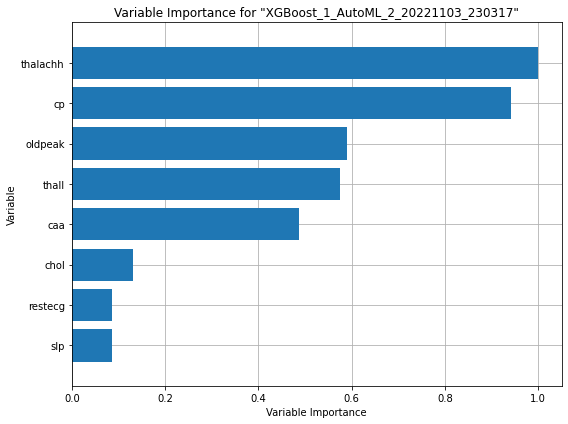

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

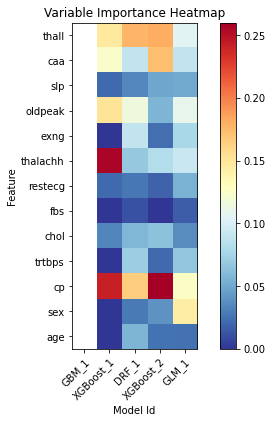

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

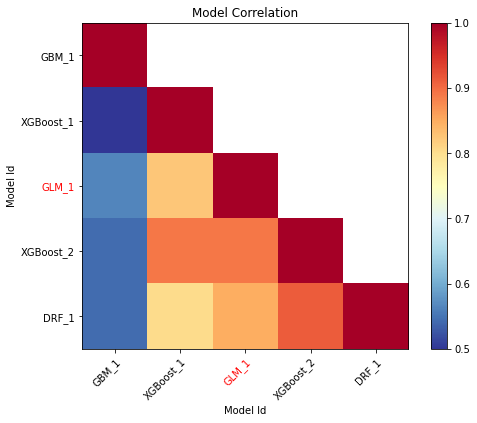

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

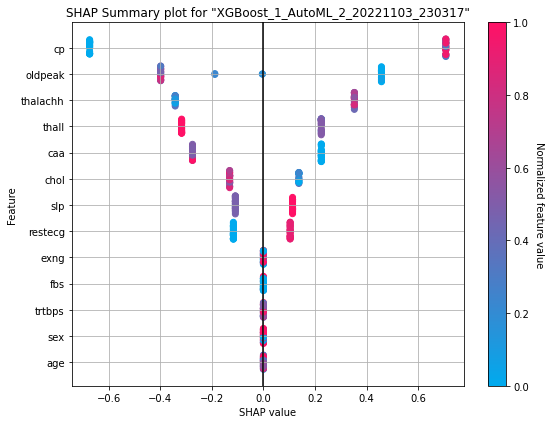

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

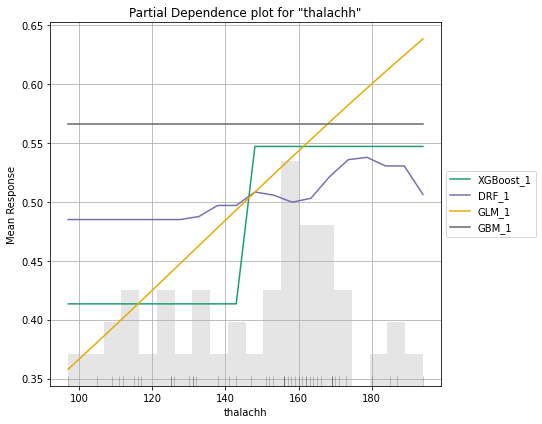

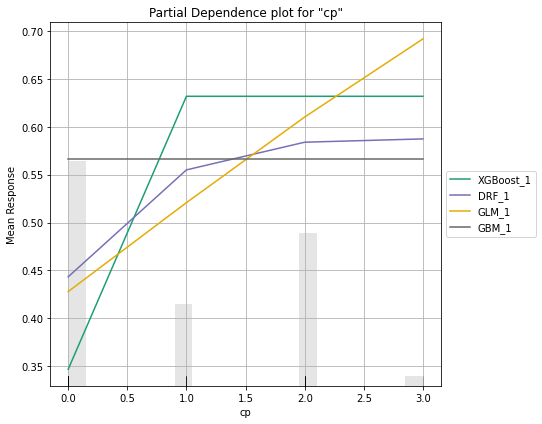

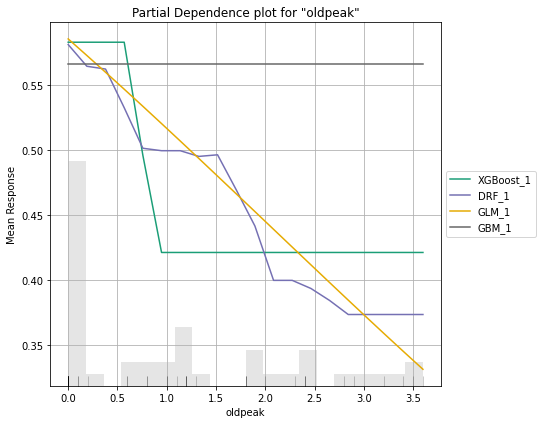

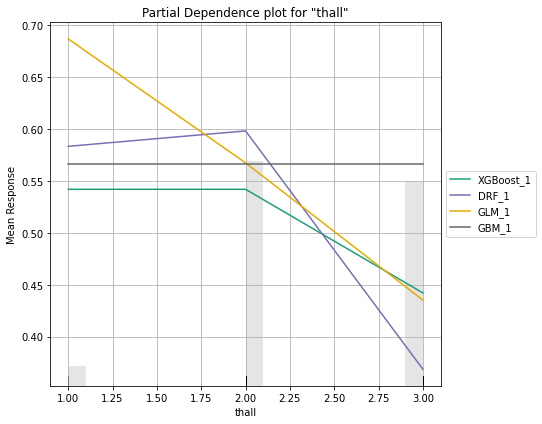

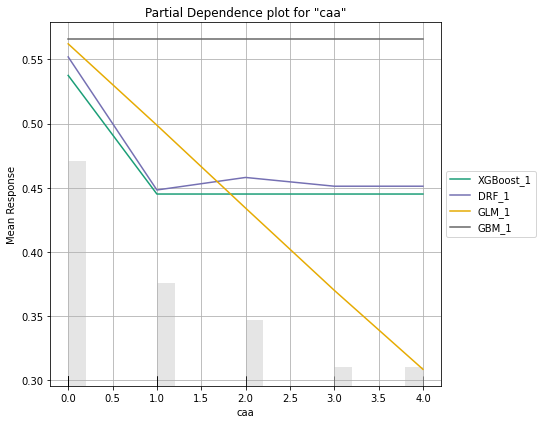

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
GLM_1_AutoML_2_20221103_230317,0.876894,0.469128,0.881262,0.151515,0.390506,0.152495,147,0.12586,GLM
XGBoost_2_AutoML_2_20221103_230317,0.869318,0.453245,0.856558,0.191288,0.380528,0.144801,334,0.670847,XGBoost
XGBoost_1_AutoML_2_20221103_230317,0.83428,0.503299,0.823425,0.232955,0.408586,0.166942,349,0.195672,XGBoost
DRF_1_AutoML_2_20221103_230317,0.816288,0.51526,0.80344,0.212121,0.418978,0.175543,281,0.306934,DRF
GBM_1_AutoML_2_20221103_230317,0.5,0.707722,0.478261,0.5,0.507181,0.257232,157,0.343361,GBM


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## XGBoost_1_AutoML_2_20221103_230317

,0,1,Error,Rate
0,15.0,9.0,0.375,(9.0/24.0)
1,2.0,20.0,0.0909,(2.0/22.0)
Total,17.0,29.0,0.2391,(11.0/46.0)


# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

In [28]:
explain_model = aml.explain(frame = h2o_test_df, figsize = (8,6))
explain_model

In [30]:
model_path = h2o.save_model(model=best_model,path='/content/model', force=True)
print(model_path)

/content/model/XGBoost_1_AutoML_2_20221103_230317
